In [19]:
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.io import loadmat
from icwaves.feature_extractors.psd import psd
import numpy as np

In [3]:
# Load the .mat file
mat_data = loadmat('../data/emotion_study/icact_iclabel/test_subj-01.mat')

# Extract the EEG data and relevant metadata
eeg_data = mat_data['data']
sampling_rate = mat_data['srate'][0][0]
icaweights = mat_data['icaweights']
icasphere = mat_data['icasphere']

# Display the shape of the EEG data and the sampling rate to confirm
eeg_data.shape, sampling_rate

((224, 1154304), 256)

In [6]:
# compute PSD on raw EEG data
eeg_psd = psd(eeg_data, sfreq=sampling_rate)

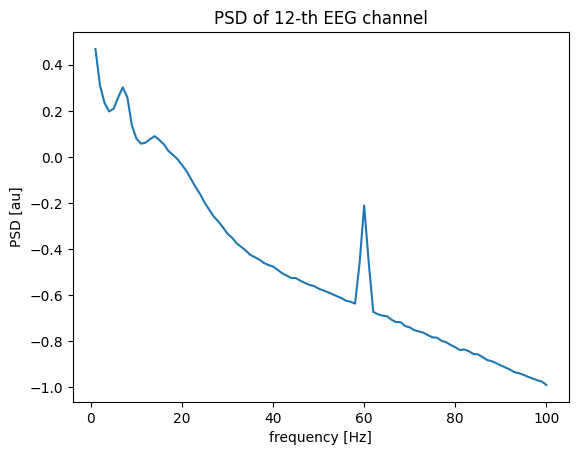

In [34]:
# Plot PSD of an EEG channel
freqs = range(1, 101)
plt.plot(freqs, eeg_psd[12])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [au]')
plt.title('PSD of 12-th EEG channel')
plt.show()

In [9]:
# compute PSD on IC activations
icaact = icaweights @ icasphere @ eeg_data
ic_psd = psd(icaact, sfreq=sampling_rate)

In [11]:
# Load data with spectral features computed in Matlab
mat_spectral_features_folder = Path('../data/emotion_study/spectral_features')
test_data_file = mat_spectral_features_folder.joinpath('test_data.mat')
test_data = loadmat(test_data_file)
psd_and_autocorr = test_data['X_test']

In [12]:
# Get the spectral features of subject #1
psd_and_autocorr_subj_1 = psd_and_autocorr[:icaact.shape[0]]

# PSD is the first half
psd_subj_1 = psd_and_autocorr_subj_1[:, :100]

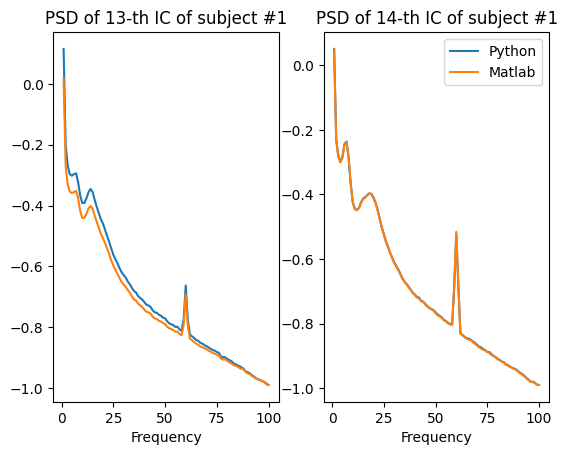

In [33]:
# Plot PSD computed in Python and Matlab
fig, ax = plt.subplots(1, 2)
ax[0].plot(freqs, ic_psd[12])
ax[0].plot(freqs, psd_subj_1[12])
ax[0].set_xlabel('Frequency')
ax[0].set_title('PSD of 13-th IC of subject #1')
ax[1].plot(freqs, ic_psd[13])
ax[1].plot(freqs, psd_subj_1[13])
ax[1].set_xlabel('Frequency')
ax[1].set_title('PSD of 14-th IC of subject #1')
ax[1].legend(['Python', 'Matlab'])
plt.show()

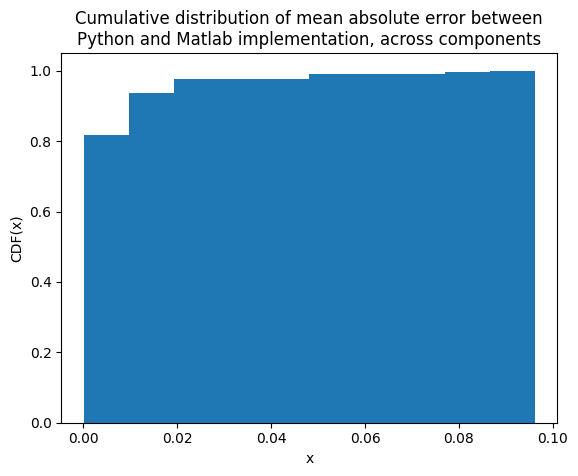

In [32]:
mean_abs_error = np.mean(np.abs(ic_psd-psd_subj_1), axis=1)
plt.hist(mean_abs_error, density=True, cumulative=True)
plt.xlabel('x')
plt.ylabel('CDF(x)')
plt.title('Cumulative distribution of mean absolute error between\nPython and Matlab implementation, across components')
plt.show()